In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [98]:
df = pd.read_csv("../../Data/companies/통합_k.csv")
df.head()
pd.unique(df.cluster_id)

array([2, 1, 3, 0])

In [99]:

df['cluster_id'] = df['cluster_id'] + 10
df_km_temp = df.sort_values(by='전출인구', ascending=True)
temp_list = df['cluster_id'].unique()

i = 3
for temp in temp_list:
    df['cluster_id'][df['cluster_id'] == temp] = i
    i-=1
df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
df['cluster_id'].unique()


array([1.  , 0.67, 0.33, 0.  ])

In [100]:
def makeViolinPlot(a, b):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(7,11))
    ax1=fig.add_subplot(2,1,1)
    ax2=fig.add_subplot(2,1,2)
    
    sns.violinplot(
        x='cluster_id',
        y=a,
        data=df,
        ax=ax1,
    )
    sns.violinplot(
        x='cluster_id',
        y=b,
        data=df,
        ax=ax2,
    )

    ax1.set_title(a, fontsize=20)
    ax2.set_title(b, fontsize=20)

    plt.show()

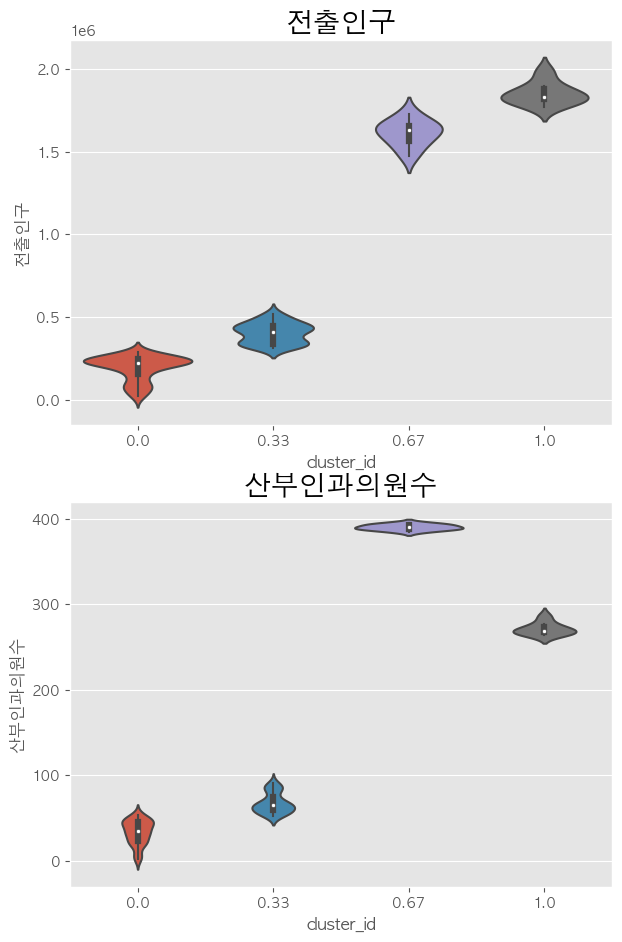

In [101]:
makeViolinPlot('전출인구', '산부인과의원수')

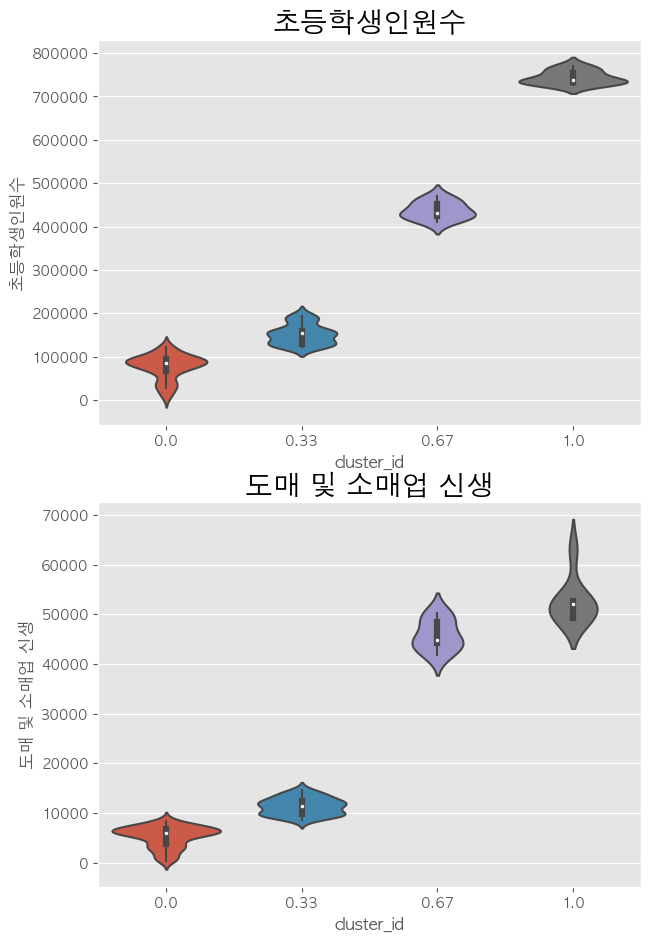

In [102]:
makeViolinPlot('초등학생인원수', '도매 및 소매업 신생')

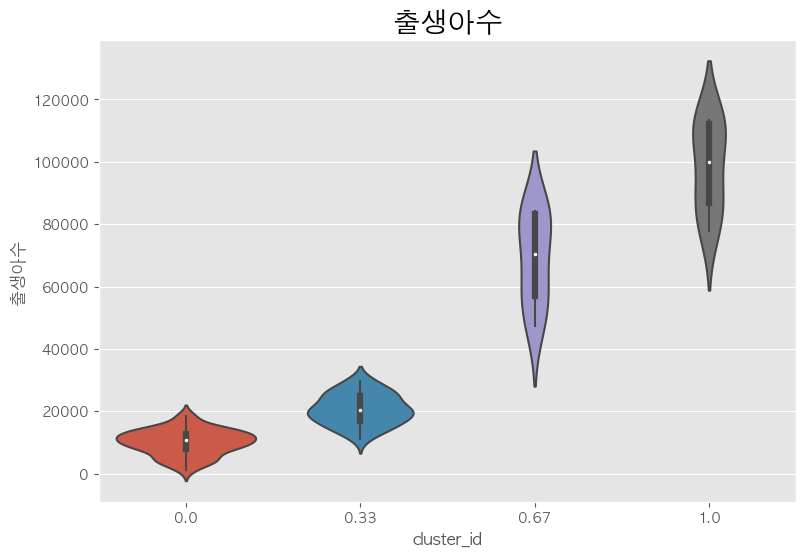

In [103]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)
# ax2=fig.add_subplot(2,1,2)

sns.violinplot(
    x='cluster_id',
    y='출생아수',
    data=df,
    ax=ax1,
)
# sns.violinplot(
#     x='cluster_id',
#     y=b,
#     data=df,
#     ax=ax2,
# )

ax1.set_title('출생아수', fontsize=20)
# ax2.set_title(b, fontsize=20)

plt.show()

In [104]:
df

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
0,1821303,112129,286,739619,49143,248468.3,13718.5,1.00
1,1620640,84066,395,469392,48097,462443.1,532689.2,0.67
2,423864,29504,65,190166,12612,57288.6,6703.3,0.33
3,496161,25831,82,160821,13902,77411.6,59554.5,0.33
4,363224,19340,86,136309,9981,46578.5,37541.7,0.33
...,...,...,...,...,...,...,...,...
131,226441,8607,40,85135,6103,28669.1,27669.5,0.00
132,243418,7481,44,79807,6405,39341.3,38725.4,0.00
133,217897,7835,32,73478,5554,22831.4,23634.2,0.00
134,94736,3989,23,40575,2856,20182.3,14025.4,0.00


In [105]:
df_s = pd.read_csv("../../Data/04.통합.csv")
df_s

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,351074
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,325766
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,69628
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,39010
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,24076
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,57094
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,22928
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,24654
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,26831


In [106]:
df_a = df_s[['년도',	'시도',	'전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생']]
df_a

,년도,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생
0,2013,경기도,1821303,112129,286,739619,49143
1,2013,서울특별시,1620640,84066,395,469392,48097
2,2013,경상남도,423864,29504,65,190166,12612
3,2013,부산광역시,496161,25831,82,160821,13902
4,2013,대구광역시,363224,19340,86,136309,9981
...,...,...,...,...,...,...,...
131,2020,충청북도,226441,8607,40,85135,6103
132,2020,대전광역시,243418,7481,44,79807,6405
133,2020,강원도,217897,7835,32,73478,5554
134,2020,제주특별자치도,94736,3989,23,40575,2856


In [107]:
df_a.describe()

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생
count,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,2016.500000,4.372486e+05,21883.522059,78.639706,159753.742647,12250.705882
std,2.299758,4.902563e+05,24451.585682,96.669707,171612.371810,14034.831937
min,2013.000000,1.510900e+04,1111.000000,2.000000,7090.000000,426.000000
25%,2014.750000,2.161832e+05,9648.750000,32.000000,83386.500000,5670.750000
50%,2016.500000,2.585805e+05,13868.000000,47.000000,98550.500000,7194.000000
75%,2018.250000,4.205855e+05,20768.000000,65.000000,155589.250000,11627.750000
max,2020.000000,1.984199e+06,113495.000000,395.000000,769744.000000,63145.000000


In [108]:
df_aa = pd.read_csv("../../Data/03.통합.csv")
df_aa[['년도',	'시도',	'전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생',	'예금은행대출금액',	'예금액']].describe()

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
count,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2016.500000,4.372486e+05,21883.522059,78.639706,159753.742647,12250.705882,87299.791912,76535.393382
std,2.299758,4.902563e+05,24451.585682,96.669707,171612.371810,14034.831937,143035.954569,158914.355822
min,2013.000000,1.510900e+04,1111.000000,2.000000,7090.000000,426.000000,2429.100000,1360.900000
25%,2014.750000,2.161832e+05,9648.750000,32.000000,83386.500000,5670.750000,22189.100000,18184.100000
50%,2016.500000,2.585805e+05,13868.000000,47.000000,98550.500000,7194.000000,31346.700000,25528.400000
75%,2018.250000,4.205855e+05,20768.000000,65.000000,155589.250000,11627.750000,74470.200000,44942.825000
max,2020.000000,1.984199e+06,113495.000000,395.000000,769744.000000,63145.000000,726164.100000,898371.800000


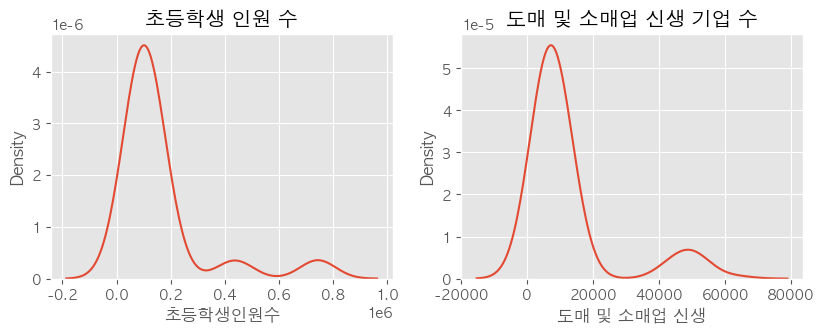

In [115]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
# ax3 = fig.add_subplot(2,3,3)
# ax4 = fig.add_subplot(2,3,4)
# ax5 = fig.add_subplot(2,3,5)
# ax6 = fig.add_subplot(2,3,6)


# kdeplot (커널밀도)
sns.kdeplot(x='초등학생인원수', data=df, ax=ax1)
# kdeplot (커널밀도)
sns.kdeplot(x='도매 및 소매업 신생', data=df, ax=ax2)
# kdeplot (커널밀도)
# sns.kdeplot(x='산부인과의원수', data=df, ax=ax3)
# # kdeplot (커널밀도)
# sns.kdeplot(x='초등학생인원수', data=df, ax=ax4)
# # kdeplot (커널밀도)
# sns.kdeplot(x='도매 및 소매업 신생', data=df, ax=ax5)

ax1.set_title('초등학생 인원 수')
ax2.set_title('도매 및 소매업 신생 기업 수')
# ax3.set_title('산부인과 의원 수')
# ax4.set_title('titanic fare - histplot')
# ax5.set_title('titanic fare - histplot')

plt.show()